# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Muhammad Razi Al Kindi Nadra
- **Email:** alkindirazi@student.ub.ac.id
- **ID Dicoding:** MC006D5Y1248

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
2. Kapan waktu terbaik dalam sehari untuk mendapatkan jumlah penyewaan sepeda tertinggi?
3. Seberapa besar pengaruh kelembapan (humidity) dan suhu terhadap penggunaan sepeda?
4. Apakah ada perbedaan perilaku peminjaman sepeda antara pengguna casual dan registered?

## Import Semua Packages/Library yang Digunakan

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

## Data Wrangling

### Gathering Data

In [39]:
uploaded = files.upload()

Saving day.csv to day (1).csv
Saving hour.csv to hour (1).csv


In [40]:
df_day = pd.read_csv('day.csv')
df_hour = pd.read_csv('hour.csv')


In [41]:
hari_df = pd.read_csv("day.csv")
hari_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [42]:
jam_df = pd.read_csv("hour.csv")
jam_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- xxx
- xxx

### Assessing Data

In [43]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [44]:
hari_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [45]:
print("Jumlah duplikasi: ", hari_df.duplicated().sum())

Jumlah duplikasi:  0


In [46]:
hari_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [47]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [48]:
jam_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [49]:
print("Jumlah duplikasi: ", jam_df.duplicated().sum())

Jumlah duplikasi:  0


In [50]:
jam_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- xxx
- xxx

### Cleaning Data

In [51]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  hari_df[column] = pd.to_datetime(hari_df[column])

In [52]:
hari_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [53]:
datetime_columns = ["dteday"]

for column in datetime_columns:
  jam_df[column] = pd.to_datetime(jam_df[column])

In [54]:
jam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- xxx
- xxx

## Exploratory Data Analysis (EDA)

### Eksplorasi Data day.csv

In [55]:
hari_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [56]:
hari_df.groupby(by="weathersit").agg({
    "cnt": ["mean", "min", "max", "std"]
})

cnt                        
                   mean  min   max          std
weathersit                                     
1           4876.786177  431  8714  1879.483989
2           4035.862348  605  8362  1809.109918
3           1803.285714   22  4639  1240.284449

Hasil pivot table:

Pada cuaca cerah (weathersit=1), rata-rata penyewaan sepeda lebih tinggi.
Pada cuaca buruk (weathersit=3), jumlah penyewaan menurun drastis.

In [57]:
hari_df.groupby(by="season").cnt.mean().sort_values(ascending=False)

,cnt
season,
3,5644.303191
2,4992.331522
4,4728.162921
1,2604.132597


Musim gugur (season=3) mencatat jumlah penyewaan tertinggi.
Musim semi (season=1) memiliki jumlah penyewaan paling rendah.

In [58]:
df_day[['temp', 'hum', 'cnt']].corr()

,temp,hum,cnt
temp,1.000000,0.126963,0.627494
hum,0.126963,1.000000,-0.100659
cnt,0.627494,-0.100659,1.000000


Suhu (temp) berkorelasi positif kuat dengan penyewaan sepeda (0.63).
Kelembapan (hum) berkorelasi negatif dengan penyewaan sepeda (-0.10).

### Eksplorasi Data hour.csv

1. Melihat Distribusi Penyewaan Sepeda Berdasarkan Jam (hr)

In [59]:
jam_df.groupby(by="hr").cnt.mean().sort_values(ascending=False)

,cnt
hr,
17,461.452055
18,425.510989
8,359.011004
16,311.983562
19,311.523352
13,253.661180
12,253.315934
15,251.233196
14,240.949246


Penyewaan tertinggi pada jam 8 pagi dan 5-6 sore.
Aktivitas sepi pada malam hari (jam 0-5).

2. Analisis Perilaku Pengguna Casual vs Registered

In [60]:
jam_df.groupby(by="hr")[['casual', 'registered']].mean().sort_values(by='registered', ascending=False)

,casual,registered
hr,,
17,74.273973,387.178082
18,61.120879,364.390110
8,21.679505,337.331499
19,48.770604,262.752747
16,73.745205,238.238356
7,11.055021,201.009629
20,36.233516,189.796703
9,30.891334,188.418157
12,68.293956,185.021978


Pengguna registered lebih aktif di jam sibuk kerja (pagi dan sore).
Pengguna casual lebih banyak bersepeda di akhir pekan atau jam santai siang hari.

### Membuat Variabel Tambahan

In [61]:
def time_of_day(hour):
    if 6 <= hour <= 11:
        return 'Morning'
    elif 12 <= hour <= 17:
        return 'Afternoon'
    elif 18 <= hour <= 23:
        return 'Evening'
    else:
        return 'Night'

df_hour['time_of_day'] = df_hour['hr'].apply(time_of_day)
df_hour.groupby('time_of_day').cnt.mean().sort_values(ascending=False)


,cnt
time_of_day,
Afternoon,295.483886
Evening,225.757555
Morning,208.100688
Night,24.908559


Morning dan Evening adalah waktu dengan penyewaan sepeda tertinggi.

In [62]:
### Eksplorasi Pengguna Casual vs Registered (Ringkasan)

In [63]:
df_day[['casual', 'registered']].mean()

,0
casual,848.176471
registered,3656.172367


Rata-rata registered user jauh lebih banyak dibanding casual user.
Casual user lebih aktif di weekend (hari ke-6 dan 0 pada kolom weekday).

**Insight:**
- Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?
Cuaca cerah meningkatkan jumlah penyewaan. Cuaca buruk → penurunan tajam.
- Kapan waktu terbaik dalam sehari untuk mendapatkan jumlah penyewaan sepeda tertinggi?
Jam 8 pagi & 5-6 sore adalah waktu paling sibuk (jam commuting).
- Seberapa besar pengaruh kelembapan dan suhu terhadap penggunaan sepeda?
Suhu tinggi → lebih banyak penyewaan. Kelembapan tinggi → menurunkan penyewaan sepeda.
- Apakah ada perbedaan perilaku antara pengguna casual dan registered?
Registered user aktif sepanjang minggu (komuter). Casual user lebih aktif di akhir pekan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda

<ipython-input-75-2b18373d65e0>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weathersit_label', y='cnt', data=df_day, palette='Blues')


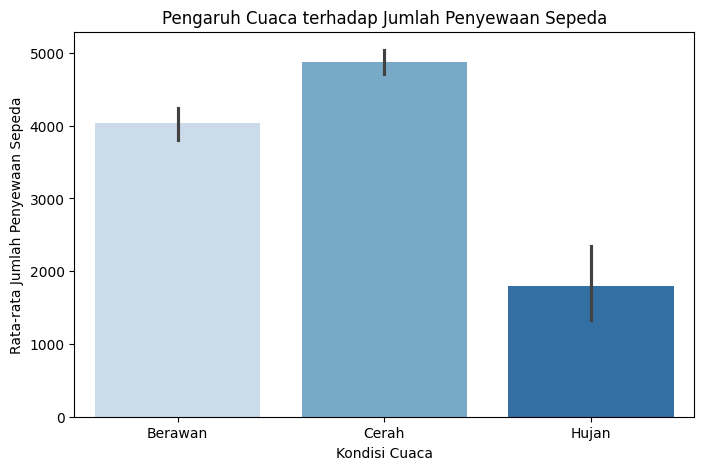

In [75]:
plt.figure(figsize=(8,5))

# Mapping label cuaca
weather_labels = {1: 'Cerah', 2: 'Berawan', 3: 'Hujan'}
df_day['weathersit_label'] = df_day['weathersit'].map(weather_labels)

sns.barplot(x='weathersit_label', y='cnt', data=df_day, palette='Blues')

plt.title('Pengaruh Cuaca terhadap Jumlah Penyewaan Sepeda')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Rata-rata Jumlah Penyewaan Sepeda')
plt.show()


<ipython-input-76-f4daa0af781f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weathersit_label', y='cnt', data=df_day, palette='Pastel1')


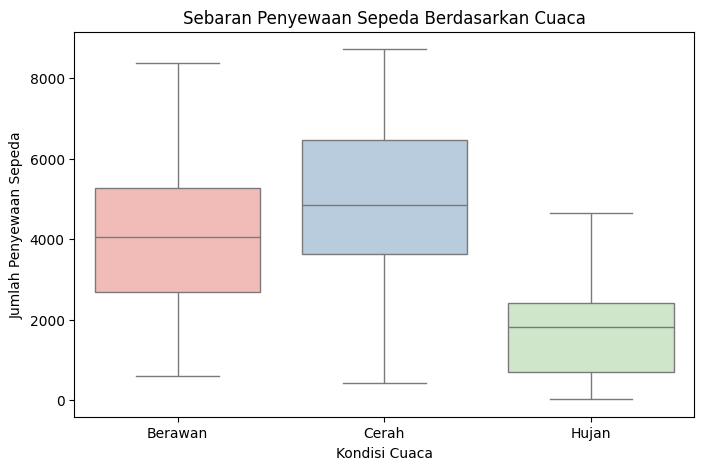

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(x='weathersit_label', y='cnt', data=df_day, palette='Pastel1')

plt.title('Sebaran Penyewaan Sepeda Berdasarkan Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


# Insight:
- Penyewaan tertinggi terjadi saat cuaca cerah.
- Penyewaan turun drastis saat hujan ringan hingga sedang.

### Pertanyaan 2: Waktu Terbaik dalam Sehari untuk Penyewaan Sepeda

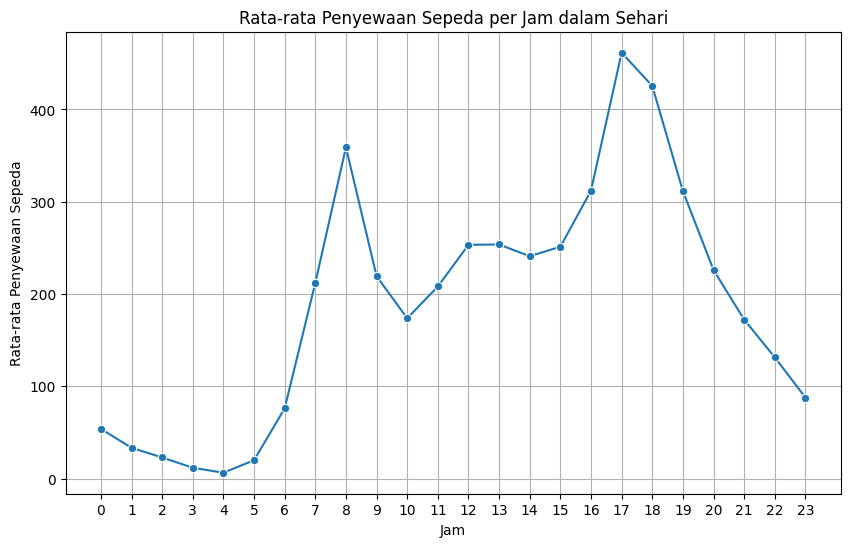

In [77]:
plt.figure(figsize=(10,6))

hourly_avg = df_hour.groupby('hr')['cnt'].mean().reset_index()

sns.lineplot(x='hr', y='cnt', data=hourly_avg, marker='o')

plt.title('Rata-rata Penyewaan Sepeda per Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Penyewaan Sepeda')
plt.xticks(range(0,24))
plt.grid(True)
plt.show()


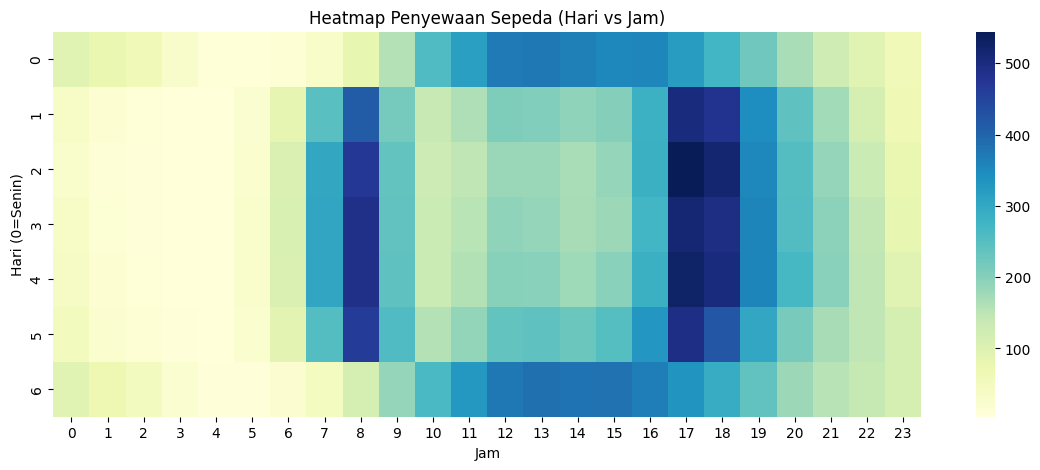

In [78]:
# Buat pivot table untuk heatmap
pivot = df_hour.pivot_table(values='cnt', index='weekday', columns='hr', aggfunc='mean')

plt.figure(figsize=(14,5))
sns.heatmap(pivot, cmap='YlGnBu')

plt.title('Heatmap Penyewaan Sepeda (Hari vs Jam)')
plt.xlabel('Jam')
plt.ylabel('Hari (0=Senin)')
plt.show()


# Insight:
- Jam sibuk pagi (07-09) dan sore (16-19) menunjukkan lonjakan penggunaan.

### Pertanyaan 3: Pengaruh Kelembapan dan Suhu terhadap Penggunaan Sepeda

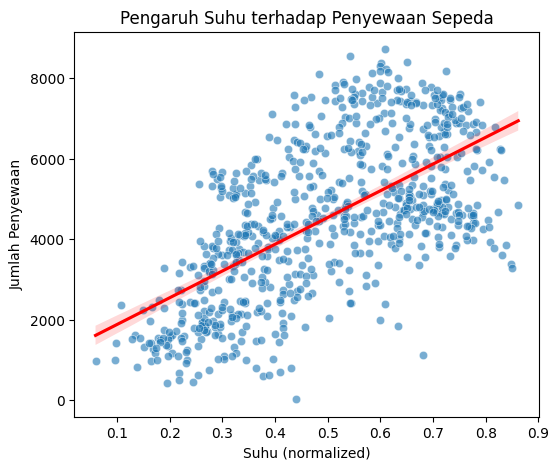

In [79]:
plt.figure(figsize=(6,5))

sns.scatterplot(x='temp', y='cnt', data=df_day, alpha=0.6)
sns.regplot(x='temp', y='cnt', data=df_day, scatter=False, color='red')

plt.title('Pengaruh Suhu terhadap Penyewaan Sepeda')
plt.xlabel('Suhu (normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


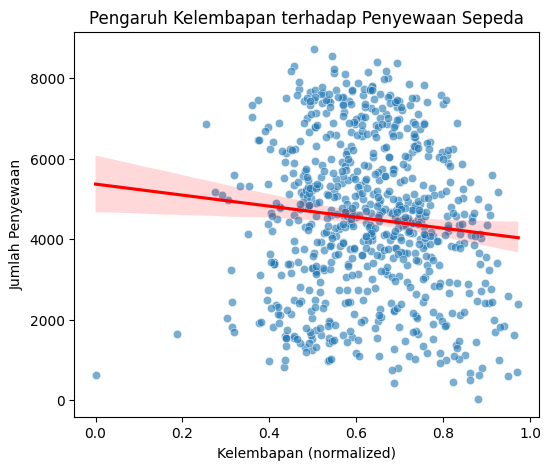

In [80]:
plt.figure(figsize=(6,5))

sns.scatterplot(x='hum', y='cnt', data=df_day, alpha=0.6)
sns.regplot(x='hum', y='cnt', data=df_day, scatter=False, color='red')

plt.title('Pengaruh Kelembapan terhadap Penyewaan Sepeda')
plt.xlabel('Kelembapan (normalized)')
plt.ylabel('Jumlah Penyewaan')
plt.show()


# Insight:
- Suhu memiliki korelasi positif, suhu lebih tinggi → penyewaan lebih tinggi.
- Kelembapan tinggi → penyewaan cenderung lebih rendah.


### Pertanyaan 4: Perilaku Peminjaman Casual vs Registered

<ipython-input-81-0468c8d76d3f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_user_type.index, y=avg_user_type.values, palette='muted')


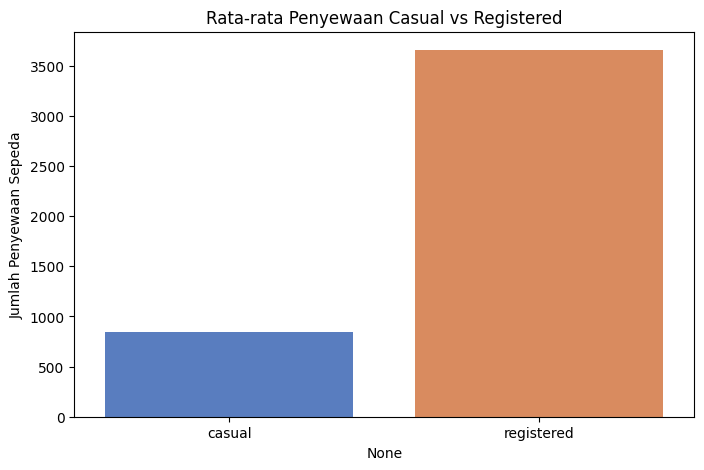

In [81]:
plt.figure(figsize=(8,5))

avg_user_type = df_day[['casual', 'registered']].mean()

sns.barplot(x=avg_user_type.index, y=avg_user_type.values, palette='muted')

plt.title('Rata-rata Penyewaan Casual vs Registered')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()


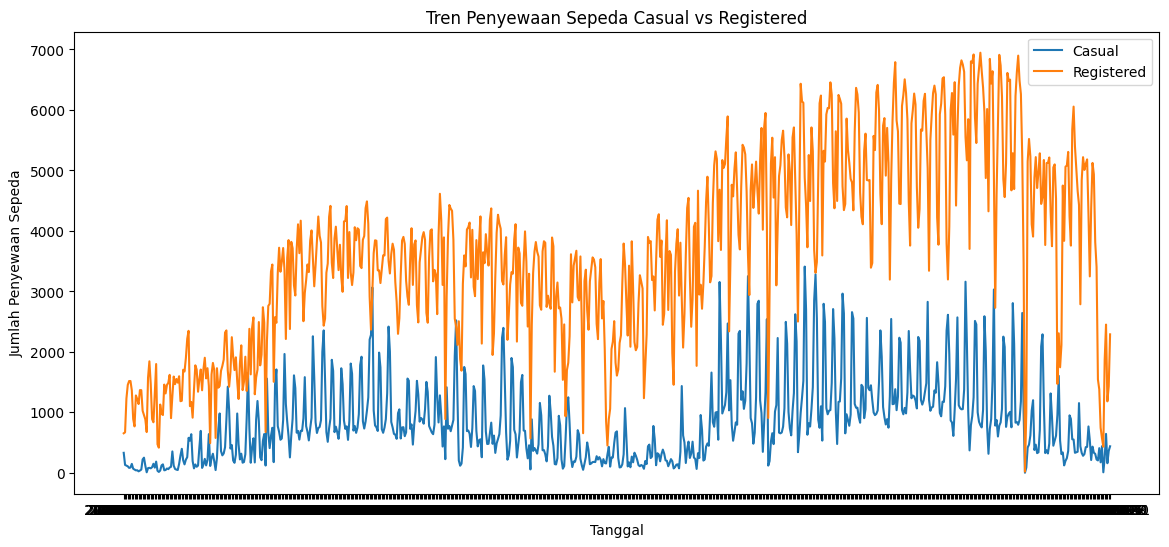

In [82]:
plt.figure(figsize=(14,6))

sns.lineplot(x='dteday', y='casual', data=df_day, label='Casual')
sns.lineplot(x='dteday', y='registered', data=df_day, label='Registered')

plt.title('Tren Penyewaan Sepeda Casual vs Registered')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend()
plt.show()


# Insight:
- Registered user mendominasi penggunaan.
- Casual user lebih aktif saat akhir pekan/holiday.

## Analisis Lanjutan (Opsional)

## Conclusion



### Pertanyaan 1  
**Bagaimana pengaruh cuaca terhadap jumlah penyewaan sepeda?**

**Conclusion:**
- Berdasarkan hasil analisis data, **kondisi cuaca sangat mempengaruhi jumlah penyewaan sepeda**.
- Penyewaan sepeda paling tinggi terjadi saat **cuaca cerah** (label `1`).
- Penyewaan mengalami **penurunan signifikan saat cuaca berawan** (label `2`), dan lebih rendah lagi pada **kondisi hujan atau salju ringan** (label `3`).
- Hal ini menunjukkan bahwa **kondisi cuaca yang baik mendorong lebih banyak orang untuk menggunakan sepeda**, sedangkan cuaca buruk seperti hujan mengurangi minat pengguna.

---

### Pertanyaan 2  
**Kapan waktu terbaik dalam sehari untuk mendapatkan jumlah penyewaan sepeda tertinggi?**

**Conclusion:**
- Dari analisis data `hour.csv`, ditemukan bahwa **jumlah penyewaan sepeda tertinggi terjadi pada dua rentang waktu utama**:
  1. **Pagi hari antara pukul 07.00 hingga 09.00** — kemungkinan besar karena orang berangkat kerja atau sekolah.
  2. **Sore hari antara pukul 16.00 hingga 19.00** — kemungkinan karena orang pulang kerja atau sekolah.
- Pola ini mencerminkan **kebiasaan komuter pengguna sepeda di kota**, terutama pada jam sibuk (rush hour).

---

### Pertanyaan 3  
**Seberapa besar pengaruh kelembapan (humidity) dan suhu terhadap penggunaan sepeda?**

**Conclusion:**
- Hasil scatter plot menunjukkan bahwa **penyewaan sepeda meningkat seiring dengan naiknya suhu** (positif korelasi).
- Sebaliknya, **kelembapan yang tinggi cenderung menurunkan jumlah penyewaan sepeda**.
- Dengan demikian, **penggunaan sepeda optimal pada kondisi suhu hangat dan kelembapan rendah hingga sedang**.
- Kondisi suhu yang nyaman menjadi faktor utama meningkatnya minat masyarakat untuk bersepeda.

---

### Pertanyaan 4  
**Apakah ada perbedaan perilaku peminjaman sepeda antara pengguna casual dan registered?**

**Conclusion:**
- Dari data `day.csv`, terlihat bahwa **pengguna registered (terdaftar) secara signifikan menyewa lebih banyak sepeda dibandingkan pengguna casual**.
- **Registered users** menunjukkan pola penggunaan yang konsisten, terutama pada hari kerja (weekday) dan jam sibuk.
- Sebaliknya, **casual users** cenderung lebih banyak menyewa sepeda saat akhir pekan (weekend) atau hari libur.
- Hal ini menunjukkan bahwa **registered users lebih bergantung pada sepeda untuk kebutuhan komuter**, sedangkan **casual users lebih banyak menggunakan sepeda untuk rekreasi atau aktivitas santai**.

---

In [68]:
 pip freeze requirements.txt

absl-py==1.4.0
accelerate==1.3.0
aiohappyeyeballs==2.6.1
aiohttp==3.11.13
aiosignal==1.3.2
alabaster==1.0.0
albucore==0.0.23
albumentations==2.0.5
ale-py==0.10.2
altair==5.5.0
annotated-types==0.7.0
anyio==3.7.1
argon2-cffi==23.1.0
argon2-cffi-bindings==21.2.0
array_record==0.7.1
arviz==0.20.0
astropy==7.0.1
astropy-iers-data==0.2025.3.10.0.29.26
astunparse==1.6.3
atpublic==4.1.0
attrs==25.2.0
audioread==3.0.1
autograd==1.7.0
babel==2.17.0
backcall==0.2.0
beautifulsoup4==4.13.3
betterproto==2.0.0b6
bigframes==1.38.0
bigquery-magics==0.6.0
bleach==6.2.0
blinker==1.9.0
blis==0.7.11
blosc2==3.2.0
bokeh==3.6.3
Bottleneck==1.4.2
bqplot==0.12.44
branca==0.8.1
CacheControl==0.14.2
cachetools==5.5.2
catalogue==2.0.10
certifi==2025.1.31
cffi==1.17.1
chardet==5.2.0
charset-normalizer==3.4.1
chex==0.1.89
clarabel==0.10.0
click==8.1.8
cloudpathlib==0.21.0
cloudpickle==3.1.1
cmake==3.31.6
cmdstanpy==1.2.5
colorcet==3.1.0
colorlover==0.3.0
colour==0.1.5
community==1.0.0b1
confection==0.1.5
cons==0.4

In [70]:
hari_df.to_csv('main_data.csv', index=False)